# 숫자 예측 모델(LSTM)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#데이터 생성(랜덤 숫자 시퀀스)
data=np.array([i for i in range(1,21)])     #1부터 20까지의 숫자
timesteps=3     #타임스텝 길이

x_data=[];
y_data=[];

#타임스텝에 따라 입력 데이터와 출력 데이터 생성
for i in range(len(data)-timesteps):
    x_data.append(data[i:i+timesteps]);     #입력(3개의 숫자)
    y_data.append(data[i+timesteps]);       #출력(다음숫자)
    
x_data=np.array(x_data).reshape(-1,timesteps,1);     #(샘플 수, 타임스텝, 피처 수)
y_data=np.array(y_data);    #출력값

#LSTM 모델 정의
model=Sequential([
    LSTM(10,input_shape=(timesteps,1)),     #LSTM 레이어(유닛:10)
    Dense(1)    #출력 레이어
]);

model.compile(optimizer="adam",loss="mse");


#모델학습
model.fit(x_data,y_data,epochs=1000,verbose=1)      #1000번 반복학습

#예측 테스트
test_input=np.array([18,19,20]).reshape(1,timesteps,1);  #입력예시
predicted_value=model.predict(test_input);

#결과출력
print("입력 데이터:", test_input.flatten())     #flatten함수: [[1,2],[3,4]-->[1,2,3,4]]
print("예측값:", predicted_value[0][0]);


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 172.3835
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 172.1826
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 171.9836
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 171.7866
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 171.5916
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 171.3986
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 171.2076
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 171.0185
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 170.8313
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 170.6460
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 170.4625
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 170.2808
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 170.1006
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 169.9220
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48m

# 기온 예측 모델(RNN)

             Date Time  p (mbar)  T (degC)  ...  wv (m/s)  max. wv (m/s)  wd (deg)
0  01.01.2009 00:10:00    996.52     -8.02  ...      1.03           1.75     152.3
1  01.01.2009 00:20:00    996.57     -8.41  ...      0.72           1.50     136.1
2  01.01.2009 00:30:00    996.53     -8.51  ...      0.19           0.63     171.6
3  01.01.2009 00:40:00    996.51     -8.31  ...      0.34           0.50     198.0
4  01.01.2009 00:50:00    996.51     -8.27  ...      0.32           0.63     214.3

[5 rows x 15 columns]
Epoch 1/5


d:\241223\aiProject2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0016 - val_loss: 3.1022e-04
Epoch 2/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.3620e-05 - val_loss: 7.3183e-05
Epoch 3/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.0968e-05 - val_loss: 7.1080e-05
Epoch 4/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.6466e-05 - val_loss: 4.4595e-05
Epoch 5/5
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.5556e-05 - val_loss: 3.2515e-04
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


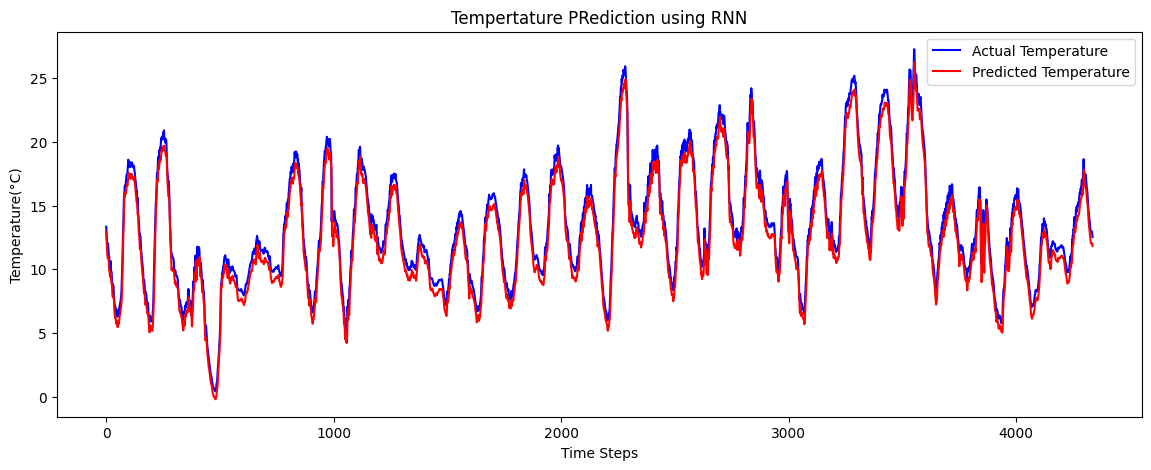

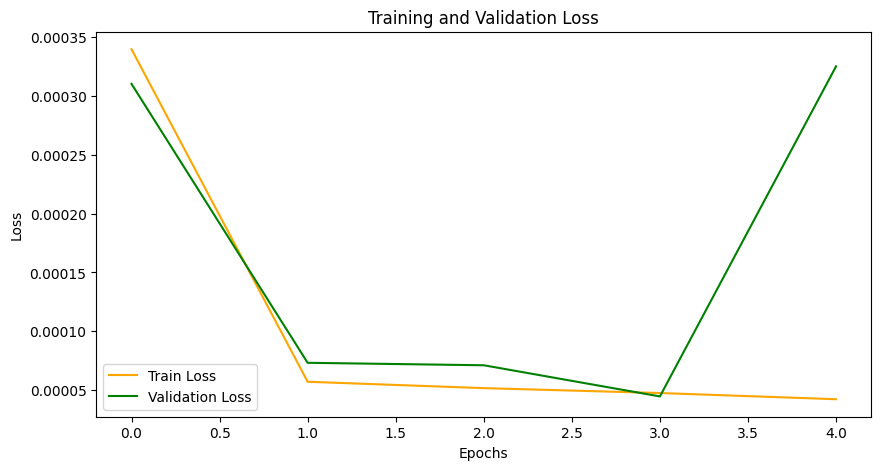

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

#데이터로드
file_path="dataset/jena_climate_2009.csv";
data=pd.read_csv(file_path);

#데이터 확인
print(data.head());

# 'T (degC)' 열이 기온 데이터
temperature=data["T (degC)"].values;

#데이터 전처리
scaler=MinMaxScaler(feature_range=(0,1))        #정규화
scaled_data=scaler.fit_transform(temperature.reshape(-1,1));

#데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X,y=[],[];
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:i+look_back,0]);
        y.append(dataset[i+look_back,0]);
    return np.array(X),np.array(y);

look_back=60;        #과거 60시간 데이터를 기반으로 예측
X,y=create_dataset(scaled_data, look_back);
X=np.reshape(X,(X.shape[0],X.shape[1],1))   #RNN 입력 형태

#데이터 분리
train_size=int(len(X)*0.8)      #80% 학습 데이터
X_train, X_test=X[:train_size],X[train_size:];
y_train,y_test=y[:train_size],y[train_size:];

#RNN 모델 구성
model=Sequential([
    SimpleRNN(50,return_sequences=False, input_shape=(X.shape[1],1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error");

#모델 학습
history=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test));

#예측
predictions=model.predict(X_test);
predictions=scaler.inverse_transform(predictions)   #정규화 복원

#실제값 복원
actual_values=scaler.inverse_transform(y_test.reshape(-1,1));

#시각화
plt.figure(figsize=(14,5));
plt.plot(actual_values, label="Actual Temperature", color="blue");
plt.plot(predictions, label="Predicted Temperature", color="red");
plt.title("Tempertature PRediction using RNN");
plt.xlabel("Time Steps");
plt.ylabel("Temperature(°C)");
plt.legend();
plt.show();

#학습 손실 시각화
plt.figure(figsize=(10,5));
plt.plot(history.history["loss"],label="Train Loss",color="orange");
plt.plot(history.history["val_loss"],label="Validation Loss",color="green");
plt.title("Training and Validation Loss");
plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.legend();
plt.show();



# 주가 예측 모델(LSTM)

[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.347174
2015-01-05  23.661268
2015-01-06  23.663504
2015-01-07  23.995314
2015-01-08  24.917271
Epoch 1/20



d:\241223\aiProject2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


543/543 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - loss: 0.0117 - val_loss: 2.8705e-04
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 2.2684e-04 - val_loss: 3.5436e-04
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 1.6293e-04 - val_loss: 3.7809e-04
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 1.4869e-04 - val_loss: 1.9679e-04
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 1.1524e-04 - val_loss: 5.1866e-04
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 1.1031e-04 - val_loss: 8.8646e-05
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 7.7503e-05 - val_loss: 2.1203e-04
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 7.4955e-05 - val_loss: 8.7026e-05
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 7.0564e-05 - val_loss: 6.5258e-05
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 5.6226e-05 - val_loss: 7.3190e-05
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step

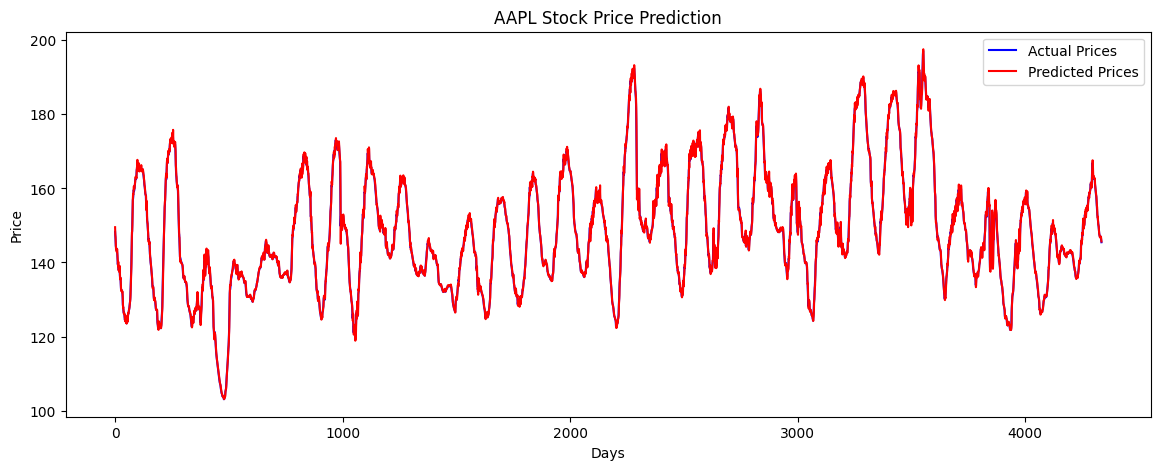

In [19]:
#증권 데이터 수집 라이브러리 설치: pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#데이터 수집
ticker="AAPL"   #예: 애플 주식
data=yf.download(ticker, start="2015-01-01",end="2024-01-01");
data=data[["Close"]];   #종가만 사용

print(data.head());

#데이터 전처리
scaler=MinMaxScaler(feature_range=(0,1));
scled_data=scaler.fit_transform(data);

def create_dataset(dataset, look_back=60):
    X,y=[],[];
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:i+look_back,0]);
        y.append(dataset[i+look_back,0]);
    return np.array(X), np.array(y);

look_back=60    #과거 60일 데이터로 예측
X,y=create_dataset(scaled_data, look_back);
X=np.reshape(X,(X.shape[0],X.shape[1],1));  #LSTM 입력형태

#모델구성
model=Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1],1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer="adam",loss="mean_squared_error");


#모델 학습
train_size=int(len(X)*0.8);
X_train, X_test=X[:train_size],X[train_size:];
y_train, y_test=y[:train_size],y[train_size:];

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test,y_test));

#예측 및 시각화
predictions=model.predict(X_test);
predictions=scaler.inverse_transform(predictions.reshape(-1,1));

#실제값 복원
actual_prices=scaler.inverse_transform(y_test.reshape(-1,1));

#시각화
plt.figure(figsize=(14,5));
plt.plot(actual_prices,label="Actual Prices", color="blue");
plt.plot(predictions, label="Predicted Prices", color="red");
plt.title(f"{ticker} Stock Price Prediction");
plt.xlabel("Days");
plt.ylabel("Price");
plt.legend();
plt.show();


# 주가 에측 모델(GRU)

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



d:\241223\aiProject2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0388 - val_loss: 9.2388e-04
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.0520e-04 - val_loss: 4.7853e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.3527e-04 - val_loss: 4.5046e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.3012e-04 - val_loss: 4.4823e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.2676e-04 - val_loss: 4.0370e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.0360e-04 - val_loss: 3.8765e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.1486e-04 - val_loss: 3.7985e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.2743e-04 - val_loss: 3.7352e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.2067e-04 - val_loss: 3.4055e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.3067e-05 - val_loss: 3.3871e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.9768e-05 - val_loss: 3

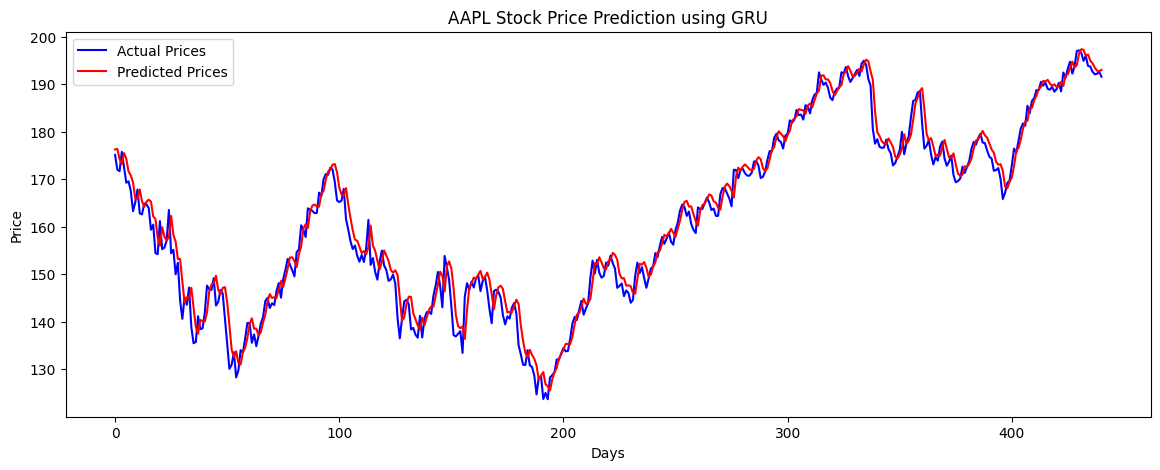

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

#데이터 수집
ticker="AAPL";  #애플주식
data=yf.download(ticker, start="2015-01-01",end="2024-01-01");
data=data[["Close"]];

#데이터 전처리
scaler=MinMaxScaler(feature_range=(0,1));   #데이터를 0~1사이로 정규화
scaled_data=scaler.fit_transform(data);

#GRU 모델에 적합한 데이터셋 생성 함수
def create_dataset(dataset, look_back):
    X,y=[],[];
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:i+look_back,0]);
        y.append(dataset[i+look_back,0]);
    return np.array(X), np.array(y);

look_back=60    #과거 60일 데이터로 예측
X,y=create_dataset(scaled_data, look_back);
X=np.reshape(X,(X.shape[0],X.shape[1],1))  #GRU 입력형태

#GRU 모델 구성
model=Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1],1)),
    GRU(50),
    Dense(1)
]);

model.compile(optimizer="adam", loss="mean_squared_error");

#모델 학습
train_size=int(len(X)*0.8)  #80%학습 데이터, 20%테스트 데이터
X_train,X_test=X[:train_size],X[train_size:];
y_train,y_test=y[:train_size],y[train_size:];

history=model.fit(X_train, y_train,epochs=20, batch_size=32, validation_data=(X_test,y_test));

#예측
predictions=model.predict(X_test);
predictions=scaler.inverse_transform(predictions.reshape(-1,1));

#실제값 복원
actual_prices=scaler.inverse_transform(y_test.reshape(-1,1));

#시각화
plt.figure(figsize=(14,5));
plt.plot(actual_prices, label="Actual Prices", color="blue");
plt.plot(predictions, label="Predicted Prices", color="red");
plt.title(f"{ticker} Stock Price Prediction using GRU");
plt.xlabel("Days");
plt.ylabel("Price");
plt.legend();
plt.show();

# 항공기 탑승객 수요예측(LSTM)

         date  count
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121


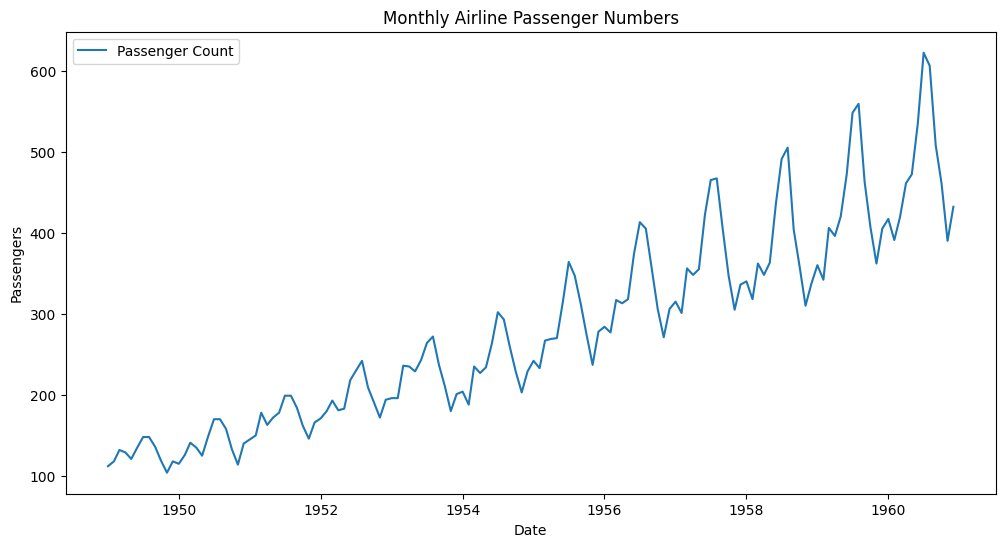

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#데이터 불러오기
data_path="dataset/airline.csv";
df=pd.read_csv(data_path);

#데이터 확인
print(df.head());

#날짜(Date)와 탑승객 수(count) 열의 이름 설정 및 변환
df["date"]=pd.to_datetime(df["date"]);
df.set_index("date", inplace=True);

#데이터 시각화
plt.figure(figsize=(12,6));
plt.plot(df["count"],label="Passenger Count");
plt.title("Monthly Airline Passenger Numbers");
plt.xlabel("Date");
plt.ylabel("Passengers");
plt.legend();
plt.show();

Epoch 1/50


d:\241223\aiProject2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0805 - val_loss: 0.1249
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0150 - val_loss: 0.0267
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0224 - val_loss: 0.0232
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0112 - val_loss: 0.0484
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0080 - val_loss: 0.0666
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0110 - val_loss: 0.0419
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0070 - val_loss: 0.0245
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - val_loss: 0.0238
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0075 - val_loss: 0.0277
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0062 - val_loss: 0.0322
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0067 - val_loss: 0.0287
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - val_loss: 0.0240
Epoch 13/50

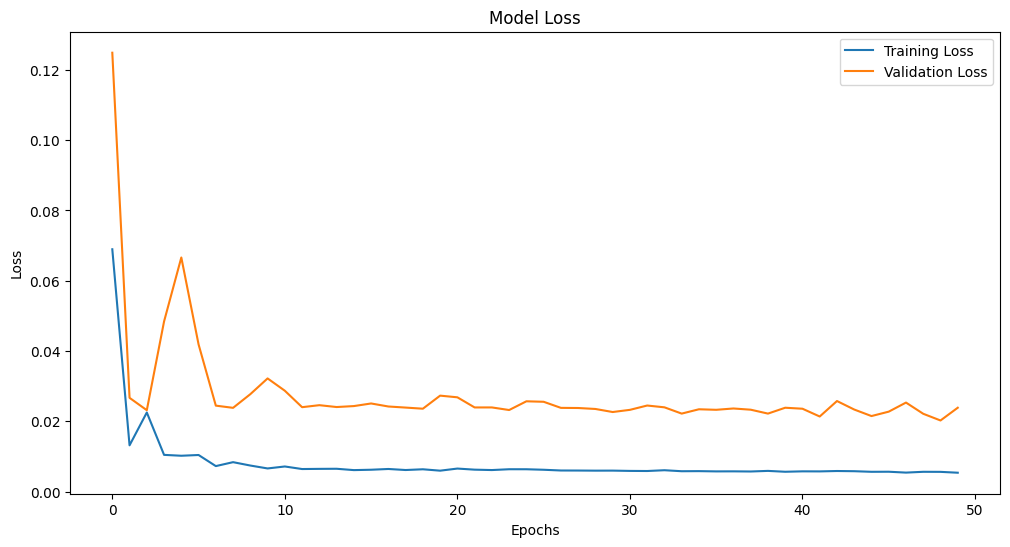

In [11]:
#데이터 정규화
scaler=MinMaxScaler(feature_range=(0,1));
scaled_data=scaler.fit_transform(df[["count"]]);

# 데이터셋 분리 (학습 데이터와 테스트 데이터)
train_size=int(len(scaled_data) * 0.8);
train_data=scaled_data[:train_size];
test_data=scaled_data[train_size:];

#시계열 데이터셋 생성함수
def create_dataset(data, time_step=12):
    X,y=[],[];
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step]);
        y.append(data[i+time_step]);
    return np.array(X),np.array(y);

time_step=12;    #12개월 단위로 예측
X_train,y_train=create_dataset(train_data, time_step);
X_test, y_test=create_dataset(test_data, time_step);

#LSTM 입력에 맞게 데이터 형태 변경
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1);
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1);

#LSTM 모델 생성
model=Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
]);

#모델 컴파일
model.compile(optimizer="adam", loss="mean_squared_error");

#모델 학습
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50, batch_size=32,verbose=1);

#학습과정 시각화
plt.figure(figsize=(12,6));
plt.plot(history.history["loss"],label="Training Loss");
plt.plot(history.history["val_loss"], label="Validation Loss");
plt.title("Model Loss");
plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.legend();
plt.show();

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


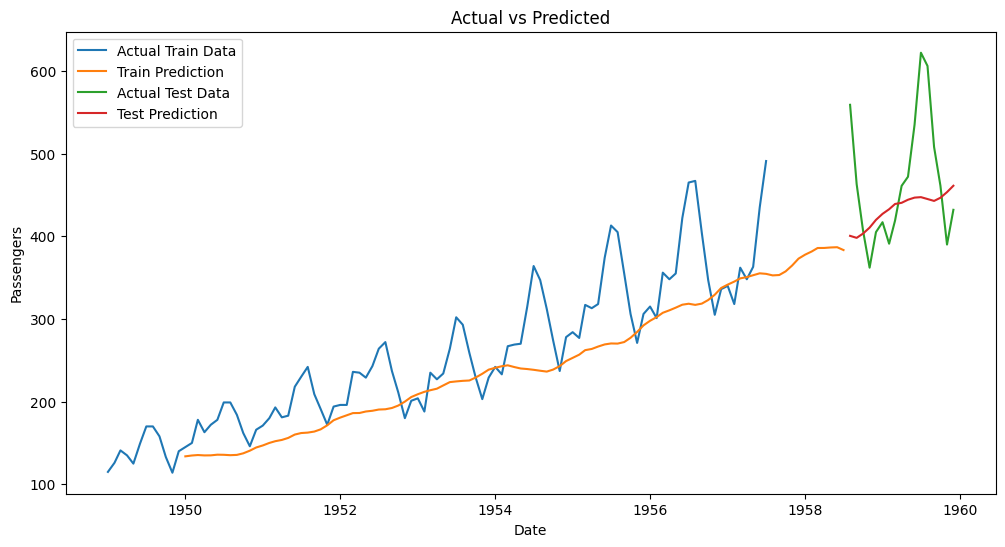

In [13]:
#테스트 데이터 예측
train_predict=model.predict(X_train);
test_predict=model.predict(X_test);

#예측값 역정규화
train_predict=scaler.inverse_transform(train_predict);
y_train=scaler.inverse_transform(y_train.reshape(-1,1));
test_predict=scaler.inverse_transform(test_predict);
y_test=scaler.inverse_transform(y_test.reshape(-1,1));

#예측결과 시각화
plt.figure(figsize=(12,6));
plt.plot(df.index[:len(y_train)],y_train, label="Actual Train Data");
plt.plot(df.index[time_step:len(train_predict)+time_step],train_predict,label="Train Prediction");
plt.plot(df.index[len(train_data):len(train_data)+len(test_predict)], y_test, label="Actual Test Data");
plt.plot(df.index[len(train_data):len(train_data)+len(test_predict)],test_predict, label="Test Prediction");
plt.title("Actual vs Predicted");
plt.xlabel("Date");
plt.ylabel("Passengers");
plt.legend();
plt.show();

# 자전거 대여량 예측(GRU)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

#데이터 불러오기
dataset_path="dataset/";
train_data=pd.read_csv(dataset_path+"train.csv");
test_data=pd.read_csv(dataset_path+"test.csv");

#데이터 전처리
def preprocess_data(data):
    data["datetime"]=pd.to_datetime(data["datetime"]);
    data["hour"]=data["datetime"].dt.hour;
    data["day"]=data["datetime"].dt.day;
    data["month"]=data["datetime"].dt.month;
    data["year"]=data["datetime"].dt.year;
    
    data=data.drop(["datetime","casual","registered"], axis=1, errors="ignore");
    return data;

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

#Feature와 Target 분리
X=train_data.drop(["count"],axis=1).values;
y=train_data["count"].values.reshape(-1,1);

#MinMaxScaler를 사용하여 데이터 정규화
scaler_X=MinMaxScaler();
scaler_y=MinMaxScaler();

X=scaler_X.fit_transform(X);
y=scaler_y.fit_transform(y);

#Train/Test 데이터 분리
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2, random_state=42);

#데이터 차원 조정(GRU 입력 형태로 변환)
X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1));
X_val=np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1));

#GRU 모델 생성
model=Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(1)
]);

model.compile(optimizer="adam", loss="mse");

#모델 학습
history=model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=50,
    batch_size=32,
    verbose=1
);




Epoch 1/50


d:\241223\aiProject2\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0340 - val_loss: 0.0307
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0302 - val_loss: 0.0295
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0283 - val_loss: 0.0257
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0257 - val_loss: 0.0243
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0244 - val_loss: 0.0218
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0219 - val_loss: 0.0207
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0205 - val_loss: 0.0187
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0194 - val_loss: 0.0165
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 10/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0167 - val_loss: 0.0154
Epoch 11/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0169 - val_loss: 0.0145
Epoch 12/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0

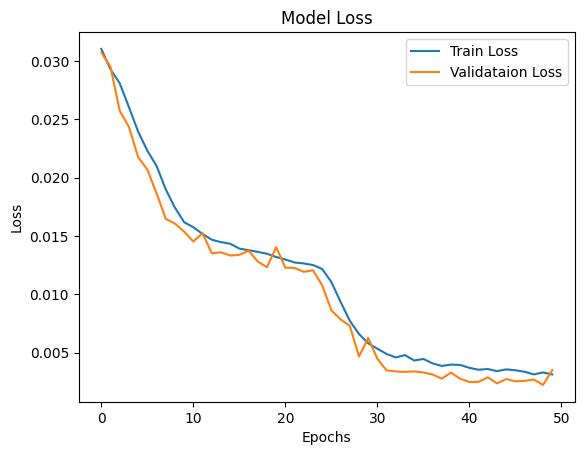

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
예측결과가 'test_predictions.csv'로 저장되었습니다.


In [23]:
#학습과정 시각화
plt.plot(history.history["loss"], label="Train Loss");
plt.plot(history.history["val_loss"], label="Validataion Loss")
plt.legend();
plt.title("Model Loss");
plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.show();

#테스트 데이터 예측
X_test=scaler_X.transform(test_data.values);
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1));

y_pred=model.predict(X_test);
y_pred=scaler_y.inverse_transform(y_pred);

#결과 저장
test_data["predicted_count"]=y_pred;
test_data.to_csv(dataset_path+"test_predictions.csv", index=False);
print("예측결과가 'test_predictions.csv'로 저장되었습니다.")